# SVM classifiers in the iris dataset

In [1]:
from sklearn import svm, datasets
from utils import make_plot, make_plot_rbf

Set constants for notebook

In [2]:
C = 1.0
MAX_ITER=10000
GAMMA=0.7
DEGREE=4

Import [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) data.

In [3]:
iris = datasets.load_iris()

Just take the first two features to learn against.

In [4]:
x = iris.data[:, :2]
y = iris.target

Create an instance of SVM and fit the data. We do not scale our data since we want to plot the support vectors.

In [5]:
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C, max_iter=MAX_ITER),
    svm.SVC(kernel='rbf', gamma=GAMMA, C=C),
    svm.SVC(kernel='poly', degree=DEGREE, gamma='auto', C=C)
)

models = (clf.fit(x, y) for clf in models)

Make plots for SVMs with different kernels. 

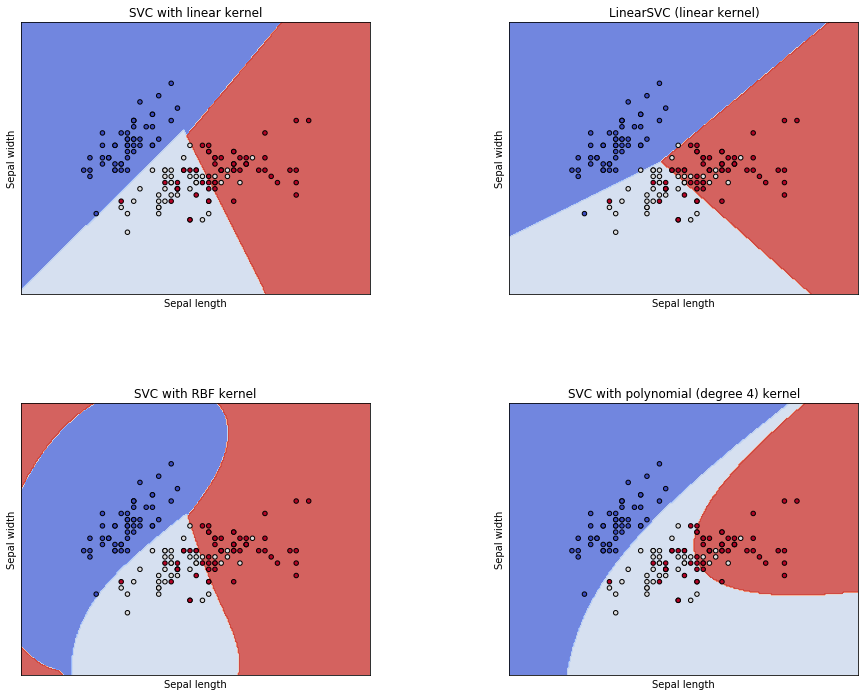

In [6]:
make_plot(models, x, y, DEGREE)

## Loop across parameters for RBF Kernel
Let's investigate the affect of the parameters $C$ and $\gamma$ on the SVM with RBF kernel.
- $C$: __Regularization parameter__. The strength of the regularization is inversely proportional to $C$. For __large__ $C$ we do little regularisation.
- $\gamma$: __Kernel coefficient__. We can increase/decrease the value of $\gamma$ in order to be more/less strict on how close $x$ must be to some landmark $l^{(i)}$ to have our kernel $f_i$ close to 1 or 0. A __small__ value of $\gamma$ will cause the features $f_i$ to vary more smoothly, and we are therefore likely to have a higher bias and lower variance (i.e.~underfitting). Similarly for large values of $\gamma$.

The RBF kernel is defined by
$$f_i=\exp\left(-\frac{||{x-l^{(i)}}||^2}{2\sigma^2}\right)=\exp\left(-\gamma{||{x-l^{(i)}}||^2}\right)$$

In [7]:
gamma_list = [0.01, 0.1, 1, 10, 100]
c_list = [0.01, 0.1, 1, 10, 100]

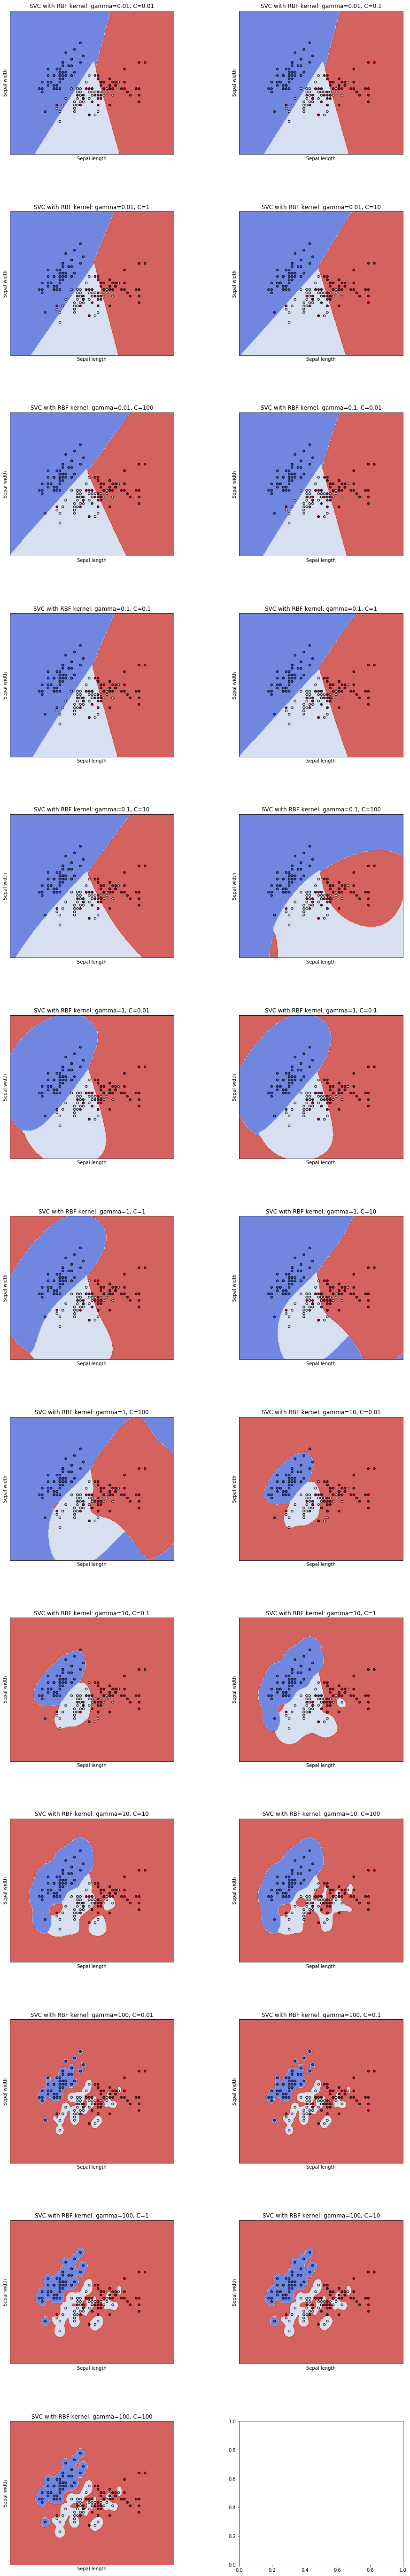

In [8]:
make_plot_rbf(x, y, gamma_list, c_list)

# References
- [Plot different SVM classifiers in the iris dataset; scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py)